In [1]:
# https://python.langchain.com/docs/integrations/tools/

from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI

import os
from dotenv import load_dotenv


C:\Users\otimi\anaconda3\envs\python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv(dotenv_path='.env')

# https://platform.openai.com/api-keys
openai_api_key = os.getenv("OPENAI_API_KEY")

# https://console.groq.com/keys
groq_api_key = os.getenv("GROQ_API_KEY")

# https://console.anthropic.com/dashboard
anthropic_api_key = os.getenv("ANTHROPIC_API_KEY")

# https://aistudio.google.com/app/apikey
gemini_api_key = os.getenv("GEMINI_API_KEY")

In [3]:
from langchain.utilities import ArxivAPIWrapper
from langchain.tools import Tool
from langchain.agents import initialize_agent, AgentType
# pip install arxiv

llm = ChatOpenAI(openai_api_key=openai_api_key, model_name="gpt-4o-mini", temperature=0)
arxiv = ArxivAPIWrapper()
arxiv_tool = Tool(
    name = "arxiv_search",
    description="Search on arxiv. The tool can search a keyword on arxiv for the top papers.",
    func=arxiv.run
)
tools = [arxiv_tool]

In [4]:
agent_chain = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, 
    verbose=False
)

C:\Users\otimi\AppData\Local\Temp\ipykernel_4896\3133663970.py:1: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  agent_chain = initialize_agent(


In [5]:
agent_chain.invoke("What is a Large Language Model?")

{'input': 'What is a Large Language Model?',
 'output': 'A Large Language Model (LLM) is a type of artificial intelligence model designed to understand and generate human language, typically trained on vast amounts of text data using deep learning techniques. Recent research highlights the challenges and advancements in applying LLMs to non-English languages, the development of multilingual models, and the performance of these models across various languages, including African languages.'}

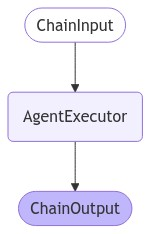

In [6]:
# pip install --quiet -U langgraph 
# https://langchain-ai.github.io/langgraph/how-tos/tool-calling/

from IPython.display import Image, display

display(Image(agent_chain.get_graph().draw_mermaid_png()))

In [7]:
question = "Qual a capital do Brasil?"
llm = ChatOpenAI(model="gpt-4o-mini", openai_api_key=openai_api_key)
messages=[{"role":"user", "content": question}]
response = llm.invoke(messages)
print(response.content)

A capital do Brasil é Brasília. Ela foi inaugurada em 21 de abril de 1960 e foi planejada para ser a nova capital do país, com o objetivo de promover o desenvolvimento do interior do Brasil.


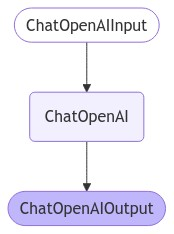

In [8]:
display(Image(llm.get_graph().draw_mermaid_png()))

In [9]:
from langchain_core.output_parsers import StrOutputParser

question = "Qual a capital do Brasil?"
llm = ChatOpenAI(model="gpt-4o-mini", openai_api_key=openai_api_key)
messages=[{"role":"user", "content": question}]
stroutput = StrOutputParser()
chain = llm | stroutput
response = chain.invoke(messages)
print(response)

A capital do Brasil é Brasília.


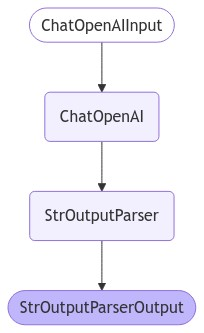

In [10]:
display(Image(chain.get_graph().draw_mermaid_png()))

In [11]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

question = "Qual a capital do Brasil?"
llm = ChatOpenAI(model="gpt-4o-mini", openai_api_key=openai_api_key)
stroutput = StrOutputParser()
template = """
Responda a pergunta {input}
"""
prompt = ChatPromptTemplate.from_template(template=template)
chain = prompt | llm | stroutput 
response = chain.invoke({"input":"Qual a capital do Brasil ?"})
print(response)

A capital do Brasil é Brasília.


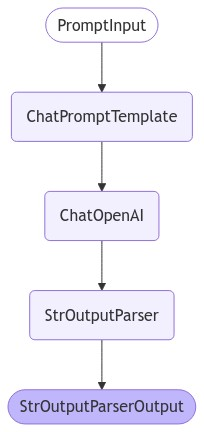

In [12]:
display(Image(chain.get_graph().draw_mermaid_png()))

In [13]:
# pip install langgraph

from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini", temperature=0, openai_api_key=openai_api_key)

# For this tutorial we will use custom tool that returns pre-defined values for weather in two cities (NYC & SF)

from typing import Literal

from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode

@tool
def get_weather(city: Literal["nyc", "sf"]):
    """Use this to get weather information."""
    if city == "nyc":
        return "It might be cloudy in nyc"
    elif city == "sf":
        return "It's always sunny in sf"
    else:
        raise AssertionError("Unknown city")

@tool
def get_coolest_cities():
    """Get a list of coolest cities"""
    return "nyc, sf"


tools = [get_weather, get_coolest_cities]
tool_node = ToolNode(tools)

# Define the graph

from langgraph.prebuilt import create_react_agent

graph = create_react_agent(model, tools=tools)

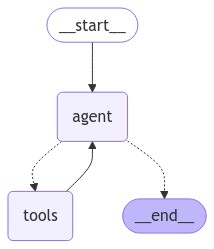

In [14]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
inputs = {"messages": [("user", "what is the weather in sf")]}
graph.invoke(inputs)

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='c9a99419-42f9-44a8-a524-d66ecd3e9a05'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_gKpfTJiJ1qjvkRez2cKQk5Oc', 'function': {'arguments': '{"city":"sf"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 76, 'total_tokens': 90, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_1bb46167f9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-18f98c3f-4cc1-48ad-997d-f36bc464218b-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'sf'}, 'id': 'call_gKpfTJiJ1qjvkRez2cKQk5Oc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 76, 'output_tokens': 14, 'total_tokens': 90}),
  ToolMessage(content="It's always sunny in sf", name='get_weather', id='1327926c-22c4-4e47-ba75-a1a54bdd29e

In [16]:
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
            
inputs = {"messages": [("user", "what is the weather in sf")]}
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

what is the weather in sf
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_lBbUmPHpr5dnzTuuhKjGBL9p)
 Call ID: call_lBbUmPHpr5dnzTuuhKjGBL9p
  Args:
    city: sf
================================= Tool Message =================================
Name: get_weather

It's always sunny in sf
================================== Ai Message ==================================

The weather in San Francisco is always sunny!


In [17]:
model_with_tools = ChatOpenAI(
    model="gpt-4o-mini", temperature=0, openai_api_key=openai_api_key
).bind_tools(tools)
model_with_tools.invoke("como está o tempo em sf?").tool_calls

[{'name': 'get_weather',
  'args': {'city': 'sf'},
  'id': 'call_RshjyArowAxOctUzZ3VMTCHN',
  'type': 'tool_call'}]

In [18]:
tool_node.invoke({"messages": [model_with_tools.invoke("como está o tempo em sf?")]})

{'messages': [ToolMessage(content="It's always sunny in sf", name='get_weather', tool_call_id='call_vVd1C6rTLVCjKeyaeO3SzM7P')]}

In [19]:
model_with_tools.invoke("como está o tempo em sf?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jNlYczS5FWsrXYhiijDJQvPH', 'function': {'arguments': '{"city":"sf"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 77, 'total_tokens': 91, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_1bb46167f9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-74044fa2-a8ef-4989-a59d-5f6eb4bb9d93-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'sf'}, 'id': 'call_jNlYczS5FWsrXYhiijDJQvPH', 'type': 'tool_call'}], usage_metadata={'input_tokens': 77, 'output_tokens': 14, 'total_tokens': 91})

In [20]:
tool_node.invoke({"messages": [model_with_tools.invoke("mostre uma lista com as cidades mais frias")]})

{'messages': [ToolMessage(content='nyc, sf', name='get_coolest_cities', tool_call_id='call_BRuvNGJPiG5cG6mfZaPGQlFE')]}

In [21]:
tool_node.invoke({"messages": [model_with_tools.invoke("qual a capital do Brasil ?")]})

{'messages': []}

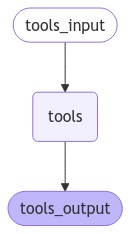

In [22]:
from IPython.display import Image, display

display(Image(tool_node.get_graph().draw_mermaid_png()))